## Modifying labels
Heatmap annotation labels & figure legend label & xlabel & ylabel</br>
For all parameters, please see: https://github.com/DingWB/PyComplexHeatmap/wiki/Parameters/

In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *

1.6.3


In [2]:
#set font to Arial using the following code
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
# set pdf.fonttype to 42
plt.rcParams['pdf.fonttype']=42

In [3]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan
df['Groups']=['G1']+['G2']+['G3']*5+['G4']+['G5']*2

### Modifying the heatmap annotations labels and xticklabels, yticklabels using `label_kws`, `xticklabels_kws` and `yticklabels_kws`
for more parameters of label_kws, see `ax.yaxis.label.properties()` <br>
for more parameters of ticklabels_kws,see `matplotlib.axes.Axes.tick_params` <br>
for more parameters for [x/y]_ticklabels_kws, see: `matplotlib.axes.Axes.tick_params` or ?`ax.tick_params`

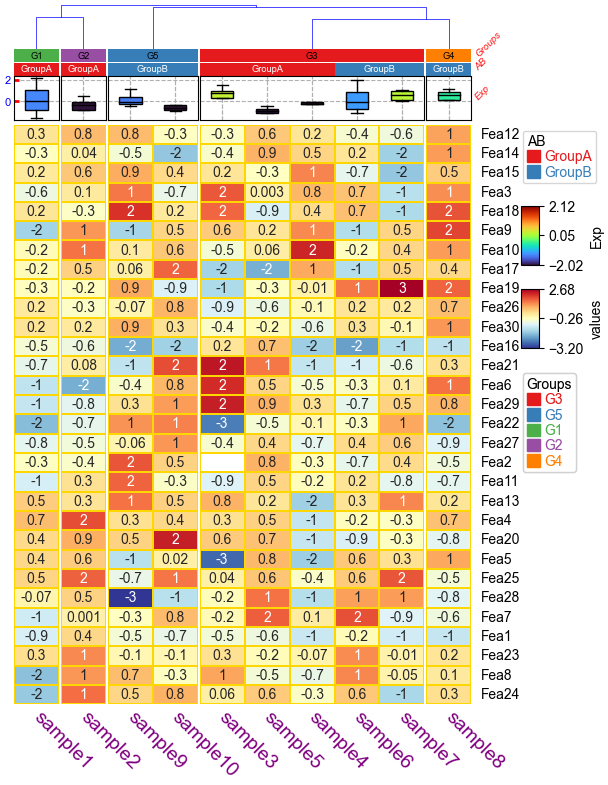

In [4]:
# `label_kws` in `HeatmapAnnotation` control the heatmap annotaiton labels
col_ha = HeatmapAnnotation(
                Groups=anno_simple(df.Groups,add_text=True,text_kws={'color':'black'}),
                AB=anno_simple(df.AB,add_text=True),axis=1,
                Exp=anno_boxplot(df_box, cmap='turbo'),
                verbose=0,label_side='right',
    
                label_kws=dict(visible=True,color='red',rotation=45,fontsize=7,fontstyle='italic',
                              alpha=0.9,verticalalignment='center',horizontalalignment='left'),
                #for more parameters of label_kws, see ax.yaxis.label.properties()
    
                ticklabels_kws=dict(which='major',color='red',labelcolor='blue',left=True,direction='in',
                                   width=2,pad=2,labelsize=8) 
                #for more parameters of ticklabels_kws,see matplotlib.axes.Axes.tick_params,
)

# `xticklabels_kws` and `yticklabels_kws` control the ticklabels for the heatmap.
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,
                       col_split=df.Groups, col_split_order="cluster_between_groups",
                       col_split_gap=0.5,col_cluster=True,
                       row_cluster=True,col_dendrogram=True,
                       label='values',show_rownames=True,show_colnames=True,
                       tree_kws={'colors':'blue'},verbose=0,legend_gap=7,
                       annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
                       
                       xticklabels_kws=dict(labelrotation=-45,labelcolor='purple',labelsize=14),
                       #more parameters for [x/y]_ticklabels_kws, see: matplotlib.axes.Axes.tick_params or ?ax.tick_params
                      )
plt.show()

### Modifying `xlabel` and `ylabel` using `xlabel_kws` and `ylabel_kws`
xlabel_kws: <br>
```python
alpha,color,fontfamily,fontname,fontproperties,fontsize,fontstyle,fontweight,label,rasterized,
rotation,rotation_mode(default,anchor),visible, zorder,verticalalignment,horizontalalignment
```
for more parameters of [x/y]_label_kws, see: 
```python
ax.xaxis.label.properties() or matplotlib.axis.XAxis.label.properties()
```

xlabel_bbox_kws:
```python
alpha,clip_box, clip_on,edgecolor,facecolor,fill,height,in_layout,label,linestyle
linewidth,rasterized,visible,width
```
See ax.xaxis.label.get_bbox_patch().properties() for more information

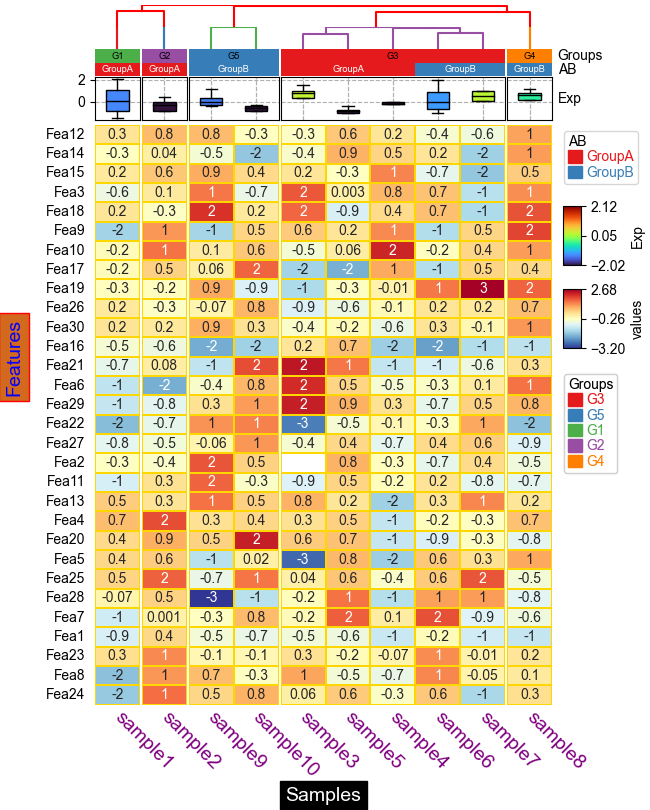

In [5]:
# `label_kws` in `HeatmapAnnotation` control the heatmap annotaiton labels
# `tree_kws` control the line in the dendrogram tree.
col_ha = HeatmapAnnotation(
                Groups=anno_simple(df.Groups,add_text=True,text_kws={'color':'black'}),
                AB=anno_simple(df.AB,add_text=True),axis=1,
                Exp=anno_boxplot(df_box, cmap='turbo'),
                verbose=0,label_side='right'
)

# `xticklabels_kws` and `yticklabels_kws` control the ticklabels for the heatmap.
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,
                       col_split=df.Groups, #col_split_order="cluster_between_groups",
                       col_split_gap=0.5,col_cluster=True,
                       row_cluster=True,col_dendrogram=True,
                       label='values',show_rownames=True,show_colnames=True,
                       row_names_side='left',
                       tree_kws=dict(colors='red',col_cmap='Set1',linewidth=1.5),verbose=0,legend_gap=7,
                       annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
                       xticklabels_kws=dict(labelrotation=-45,labelcolor='purple',labelsize=14),
                       #more parameters for [x/y]_ticklabels_kws, see: matplotlib.axes.Axes.tick_params or ?ax.tick_params
                       xlabel='Samples',ylabel="Features",
                       xlabel_kws=dict(color='white',fontsize=14),
                       ylabel_kws=dict(color='blue',fontsize=14,labelpad=45), #increace labelpad manually using labelpad (points)
                       xlabel_bbox_kws=dict(facecolor='black'),
                       ylabel_bbox_kws=dict(facecolor='chocolate',edgecolor='red'),
                      )
plt.show()